# OilDesk-Python-Assessment: Question 1

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 

## 1. Load a given CSV file containing metal prices into a Pandas DataFrame

In [2]:
csv_file_path = "../data/MarketData.csv"
df = pd.read_csv(csv_file_path)

In [3]:
# Names of commodities clearly visible in third row
df.head(10)

,Start Date,01/01/2010,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,End Date,01/01/2023,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,LME COPPER 3MO ($),LME ALUMINUM 3MO ($),LME ZINC 3MO ($),LME LEAD 3MO ($),LME TIN 3MO ($),Generic 1st 'CL' Future
3,NaN,LMCADS03 Comdty,LMAHDS03 Comdty,LMZSDS03 Comdty,LMPBDS03 Comdty,LMSNDS03 Comdty,CL1 Comdty
4,NaN,Settlement Price,Settlement Price,Settlement Price,Settlement Price,Settlement Price,Settlement Price
5,Dates,PX_SETTLE,PX_SETTLE,PX_SETTLE,PX_SETTLE,PX_SETTLE,PX_SETTLE
6,01/01/2010,7375,2230,2560,2432,16950,79.36
7,04/01/2010,7500,2267,2574,2515,17450,81.51
8,05/01/2010,7485,2302,2575,2522.5,17375,81.77
9,06/01/2010,7660,2377,2718,2680,17825,83.18


In [4]:
# Relevant price data begins in seventh row
df = df.drop(range(6))

# Easier to filter data with more intuitive names
df.columns = ['Date', 'Copper', 'Aluminium', 'Zinc', 'Lead', 'Tin', 'Oil']

In [5]:
df.head()

,Date,Copper,Aluminium,Zinc,Lead,Tin,Oil
6,01/01/2010,7375,2230,2560,2432,16950,79.36
7,04/01/2010,7500,2267,2574,2515,17450,81.51
8,05/01/2010,7485,2302,2575,2522.5,17375,81.77
9,06/01/2010,7660,2377,2718,2680,17825,83.18
10,07/01/2010,7535,2310,2607,2599,17475,82.66


In [6]:
# Checks data types of columns as expected
print("Data types of each column:\n")
print(df.dtypes)

Data types of each column:

Date         object
Copper       object
Aluminium    object
Zinc         object
Lead         object
Tin          object
Oil          object
dtype: object


In [7]:
# Check for missing values in each column
print("Missing values per column:\n")
print(df.isnull().sum())

Missing values per column:

Date         0
Copper       0
Aluminium    0
Zinc         0
Lead         0
Tin          0
Oil          0
dtype: int64


Not reindexed DataFrame as still to filter. Will convert relevant columns to DateTime/ numeric data after dropping redundant ones to decrease overhead.

## 2. Filter the data to include only 'Copper' and 'Zinc' for the year 2021

When filtering the data above and below, as well as in subsequent questions, I've mostly chosen to overwrite the DataFrame into the same variable **`df`** in order to keep the code concise as well as to conserve memory efficiently and reduce overhead. It is also clear from the question that no intermediate results from the filtering process need to be retained and the small amount of filtering steps required ensures there are no problems with readability.

In [8]:
# Removes all columns apart from 'Date', Copper' and 'Zinc'
df = df.loc[:, ['Date', 'Copper', 'Zinc']]

In [9]:
# Creates a list of columns to be converted to numeric values
columns_to_numeric = ['Copper', 'Zinc']

# Converts list of columns to numeric values
for column in columns_to_numeric:
    df.loc[:, column] = pd.to_numeric(df[column], errors='coerce')
    
# Converts (day-first) date strings to datetime objects
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [10]:
# Filters data to only include the year 2021
filtered_data = df.loc[df['Date'].dt.year == 2021]

# Reindexes DataFrame (in place) to make filtered data more readable, dropping old index
filtered_data.reset_index(drop=True, inplace=True)

In [11]:
# Checks filtered data begins at the start of the year 2021
filtered_data.head()

,Date,Copper,Zinc
0,2021-01-01,7766.0,2751.0
1,2021-01-04,7860.5,2792.0
2,2021-01-05,8002.0,2813.0
3,2021-01-06,8037.5,2860.0
4,2021-01-07,8179.0,2888.0


In [12]:
# Checks filtered data finishes at the end of the year 2021
filtered_data.tail()

,Date,Copper,Zinc
256,2021-12-27,9568.0,3519.0
257,2021-12-28,9568.0,3519.0
258,2021-12-29,9680.5,3513.0
259,2021-12-30,9691.5,3532.5
260,2021-12-31,9720.5,3534.0


## 3. Calculate the average price per month for each metal and plot it

In [13]:
# Calculates the average monthly price in 2021 for both copper and zinc
monthly_avg = filtered_data.groupby(filtered_data['Date'].dt.to_period('M')).agg({'Copper': 'mean', 'Zinc': 'mean'}).reset_index()

In [14]:
# Converts the datetime objects in the 'Date' column back to strings
monthly_avg['Date'] = monthly_avg['Date'].dt.strftime('%m')

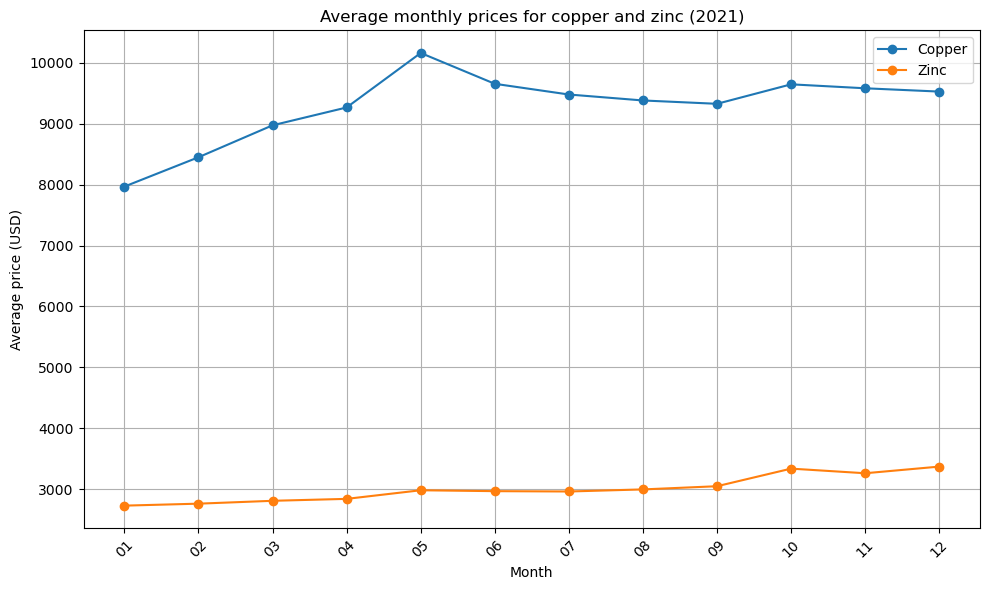

In [15]:
# Plots the average price per month for each metal
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg['Date'], monthly_avg['Copper'], label='Copper', marker='o')
plt.plot(monthly_avg['Date'], monthly_avg['Zinc'], label='Zinc', marker='o')
plt.title('Average monthly prices for copper and zinc (2021)')
plt.xlabel('Month')
plt.ylabel('Average price (USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()